In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize

onehotencoder = OneHotEncoder(handle_unknown='ignore')

# copy and save categorical data, then remove them from the original
categorical = insurance[['sex','smoker','region']].copy()
insurance.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

dummies = pd.get_dummies(categorical[:])
insurance = pd.concat([dummies, insurance], sort = 'true', axis = 1)

insurance.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,1,0,0,1,0,0,0,1,19,27.900,0,16884.92400
1,0,1,1,0,0,0,1,0,18,33.770,1,1725.55230
2,0,1,1,0,0,0,1,0,28,33.000,3,4449.46200
3,0,1,1,0,0,1,0,0,33,22.705,0,21984.47061
4,0,1,1,0,0,1,0,0,32,28.880,0,3866.85520


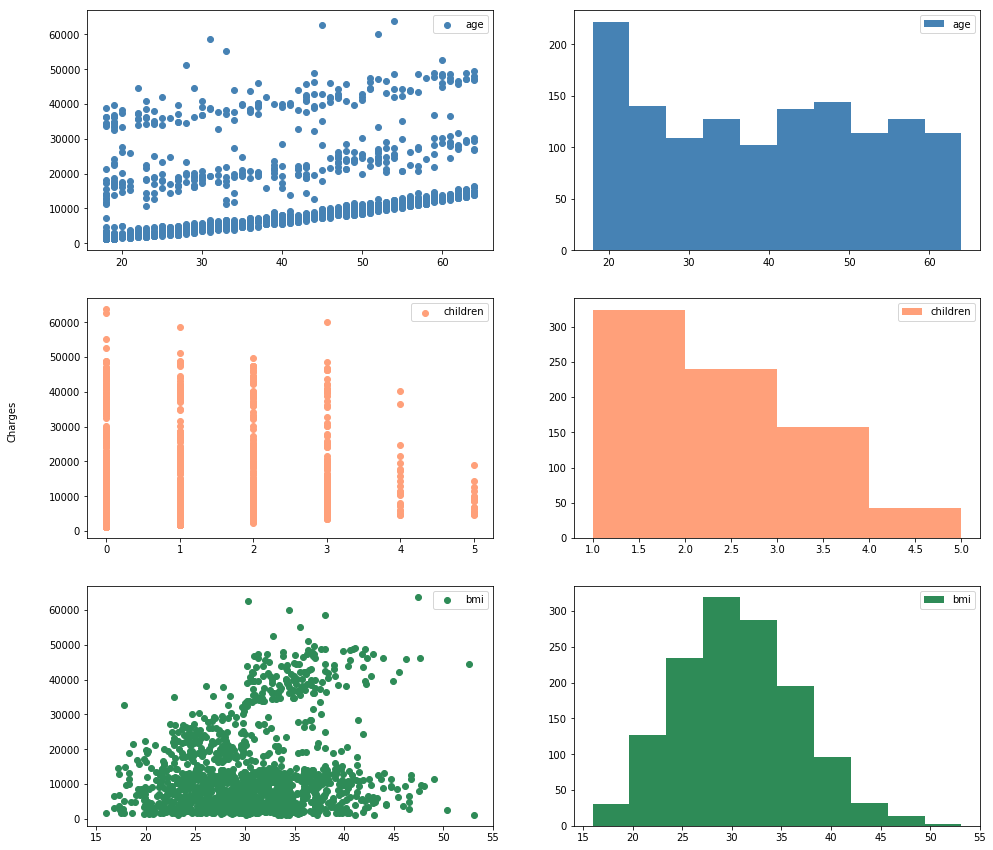

In [3]:
#plt.scatter(insurance['bmi'], insurance['charges'], label= 'bmi', color='blue')
fig = plt.figure(figsize=(16, 15))

fig.text(0.06, 0.5, 'Charges', ha='center', va='center', rotation='vertical')

ax1 = fig.add_subplot(321)
ax1.scatter(insurance['age'], insurance['charges'], label= 'age', color='#4682B4')
ax1.legend()

ax1 = fig.add_subplot(322)
ax1.hist(insurance['age'], label= 'age', color='#4682B4')
ax1.legend()

ax3 = fig.add_subplot(323)
ax3.scatter(insurance['children'], insurance['charges'], label= 'children', color='#FFA07A')
ax3.legend()

ax1 = fig.add_subplot(324)
ax1.hist(insurance['children'], label= 'children', bins=[1,2,3,4,5], color='#FFA07A')
ax1.legend()

ax2 = fig.add_subplot(325)
ax2.scatter(insurance['bmi'], insurance['charges'], label= 'bmi', color='#2E8B57')
ax2.legend()

ax1 = fig.add_subplot(326)
ax1.hist(insurance['bmi'], label= 'bmi', color='#2E8B57')
ax1.legend()

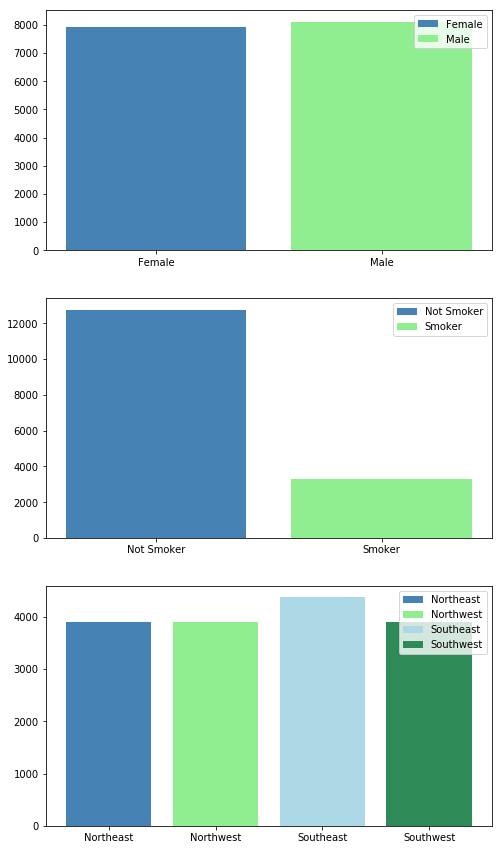

In [4]:
fig = plt.figure(figsize=(8, 15))

ax1 = fig.add_subplot(311)
ax1.bar(['Female'], insurance.loc[insurance['sex_female'] == 1].size, label= 'Female', color='#4682B4')
ax1.bar(['Male'], insurance.loc[insurance['sex_male'] == 1].size, label= 'Male', color='#90EE90')
ax1.legend()


ax1 = fig.add_subplot(312)
ax1.bar(['Not Smoker'], insurance.loc[insurance['smoker_no'] == 1].size, label= 'Not Smoker', color='#4682B4')
ax1.bar(['Smoker'], insurance.loc[insurance['smoker_yes'] == 1].size, label= 'Smoker', color='#90EE90')
ax1.legend()


ax1 = fig.add_subplot(313)
ax1.bar(['Northeast'], insurance.loc[insurance['region_northeast'] == 1].size, label= 'Northeast', color='#4682B4')
ax1.bar(['Northwest'], insurance.loc[insurance['region_northwest'] == 1].size, label= 'Northwest', color='#90EE90')
ax1.bar(['Southeast'], insurance.loc[insurance['region_southeast'] == 1].size, label= 'Southeast', color='#ADD8E6')
ax1.bar(['Southwest'], insurance.loc[insurance['region_southwest'] == 1].size, label= 'Southwest', color='#2E8B57')
ax1.legend()

### Build Linear Regression
Build the first models, check summaries and plot results

In [5]:
from sklearn.model_selection import train_test_split

x = insurance.iloc[:,:11]
y = insurance.iloc[:,11:]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [6]:
# Build a linear regression and display the summary with stats models api
import statsmodels.api as sm

smX = sm.add_constant(x)
model = sm.OLS(y, smX)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 27 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:30:04   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -296.4168    430.507  

C:\Users\thiag\.conda\envs\Training\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

def regression(X_train, X_test, y_train, y_test, lin_model):
    # Create linear regression object
    model = lin_model
    # Train the model using the training sets
    model.fit(X_train, y_train)
    # Make predictions using the testing set
    y_pred = model.predict(X_test)

    print('r2: %.2f' % r2_score(y_test, y_pred), '\n')
    print('Coefficients: \n', model.coef_)
    
    return y_pred

# show a chart with the predictions and the actual values from testing
def Show_Pred_Chart(y_test, y_pred):
    # create a dataframe with the the predictions and the actual values, 
    # sort them by 'charges' and create an index to display them in the proper order
    results = y_test.copy()
    results['pred'] = y_pred
    results = results.sort_values(by = 'charges')
    myId = np.arange(1,results.shape[0]+1)
    results['id'] = myId
    
    # show the chart
    plt.scatter(results['id'], results['pred'], color='blue')
    plt.scatter(results['id'], results['charges'], color='black', marker='1')
    plt.legend()
    plt.show()

In [8]:
# define a model for a linear regression
alpha = linear_model.LinearRegression(fit_intercept=False, normalize=True, copy_X=True)

# build the model, show r2 and coeffs, and return the predictions
y_pred = regression(X_train, X_test, y_train, y_test, alpha)

r2: 0.79 

Coefficients: 
 [[   -88.72771277    -76.11243789 -11828.99274639  11664.15259574
     568.38876261    164.76540724   -348.94166513   -549.05265538
     263.75060777    311.57175505    473.04562464]]


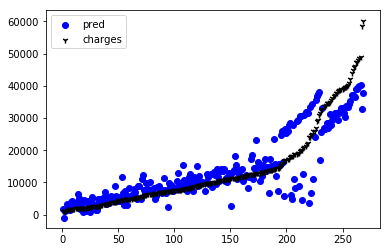

In [9]:
# plot predictions and actual values
Show_Pred_Chart(y_test, y_pred)

### Remove some fields  
As indicated by the summary there are collinearity problems, this means we might have two variables indicating the same value or maybe a constant in our data.

    "[2] The smallest eigenvalue is 1.04e-29. This might indicate that there are
    strong multicollinearity problems or that the design matrix is singular."

There isn't any constant values but when when our categories were transformed to binaries we introduced some redundant fields like "sex_female - sex_male" and "smoker_yes - smoker_no".

In [10]:
x = insurance.iloc[:,:11]
y = insurance.iloc[:,11:]

# drop fields
x.drop(['sex_female', 'smoker_no'], axis=1, inplace=True)
# build training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [11]:
# define a model for a linear regression
alpha = linear_model.TheilSenRegressor(copy_X=True, random_state=200)

# build the model, show r2 and coeffs, and return the predictions
y_pred = regression(X_train, X_test, y_train, y_test, alpha)

C:\Users\thiag\.conda\envs\Training\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2: 0.67 

Coefficients: 
 [ -438.21380273 20444.29494532  -851.10870345 -1681.26567803
 -1945.66231046 -1903.91738904   260.38471158   187.05811395
   512.28764955]


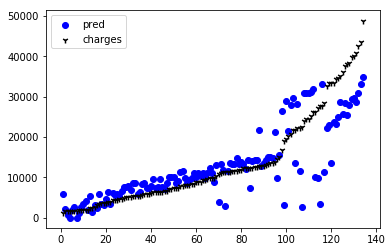

In [12]:
# plot predictions and actual values
Show_Pred_Chart(y_test, y_pred)

### Test ElaticNet Regression
This combines features from lasso and ridge regression

In [13]:
# define a model for a linear regression
alpha = linear_model.ElasticNet(alpha=0.01, selection='random')

# build the model, show r2 and coeffs, and return the predictions
y_pred = regression(X_train, X_test, y_train, y_test, alpha)

r2: 0.69 

Coefficients: 
 [ -175.7375627  23265.54343572   789.39904893   136.34016252
  -567.65592088  -359.54825187   263.74972548   343.13989963
   493.80382709]


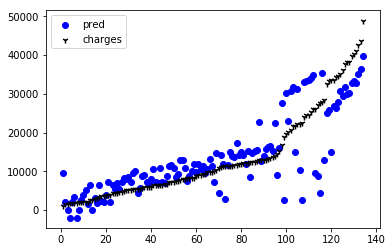

In [14]:
# plot predictions and actual values
Show_Pred_Chart(y_test, y_pred)

### Tensorflow
Crete a very simple model with Keras

In [15]:
x = insurance.iloc[:,:11]
y = insurance.iloc[:,11:]

In [16]:
import tensorflow.keras as keras
from tensorflow.keras import layers
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

model = keras.Sequential()
model.add(layers.Dense(64, input_dim=11, activation='relu', kernel_initializer='random_uniform', bias_initializer='ones'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(16,activation='softmax'))
model.add(layers.Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', optimizer='adam')
norm = StandardScaler()

xs = norm.fit_transform(x)
ys = norm.fit_transform(y)

trainX, testX, trainy, testy = train_test_split(xs, ys, test_size = 0.3, random_state = 100)

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)

C:\Users\thiag\.conda\envs\Training\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\thiag\.conda\envs\Training\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Train: 0.156, Test: 0.127


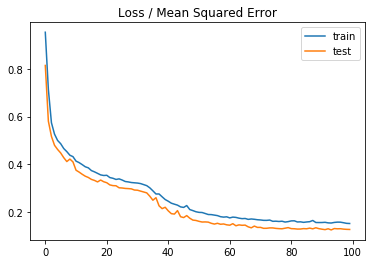

In [17]:
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

402/402 [==============================] - 0s 71us/sample


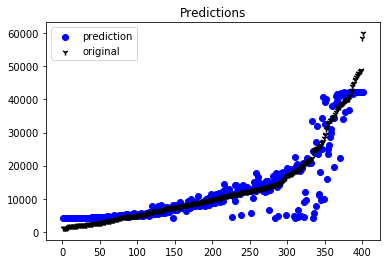

In [18]:
pred = model.predict(testX, verbose=1)
org_pred = norm.inverse_transform(pred)
org_val = norm.inverse_transform(testy)

bravo = pd.DataFrame(data=org_pred[1:,0], columns=['Prediction'])
bravo['charges'] = org_val[1:,0]

bravo.sort_values(by='charges', inplace=True)
bravo = bravo.reset_index(drop=True)
myId = np.arange(1,bravo.shape[0]+1)
bravo['id'] = myId


plt.title('Predictions')
plt.scatter(bravo['id'],bravo['Prediction'], label='prediction',color='blue')
plt.scatter(bravo['id'],bravo['charges'], label='original',color='black', marker='1')
plt.legend()
plt.show()